# Data analysis

Sentiment:
* If sentiment is zero, then it means neutral sentiment.
* If sentiment is less than zero, then it means a negative sentiment.
* And if sentiment is more than zero, then it means a positive sentiment.

In [1]:
from pymongo import MongoClient
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
import pprint

# Connection to MongoDB
client = MongoClient()
db = client.twitter_data
col = db.twitter_data

# Fetch all the data
result = col.find().limit(500)

# Create a Pandas dataframe
df = pd.DataFrame(list(result))
df.sentiment = df.sentiment.astype(float)
df.created_at = pd.to_datetime(df.created_at)

We print the mean of sentiment per country of all time.

In [25]:
df.groupby(['country_code'])['sentiment'].mean()

country_code
AR    0.359931
BO    0.424773
CR    0.352961
EC    0.423222
ES    0.369113
HN    0.358650
PY    0.338932
VE    0.197891
Name: sentiment, dtype: float64

We print the total tweets per country.

In [26]:
df.groupby(['country_code'])['sentiment'].count()

country_code
AR    238326
BO      1429
CR      9103
EC     15089
ES    158645
HN      1896
PY     11967
VE     63545
Name: sentiment, dtype: int64

The next picture shows the mean of all countries per day.

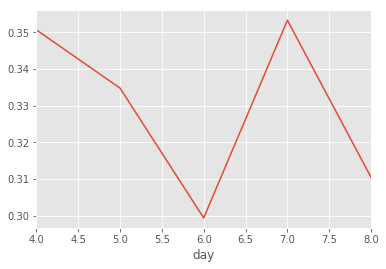

In [27]:
df_mean_all = pd.concat([df['created_at'].dt.day, df['sentiment']], axis=1, keys=['day', 'sentiment'])
df_mean_all.groupby(['day'])['sentiment'].mean().plot()

The next plot shows the mean per day and per country of all data.

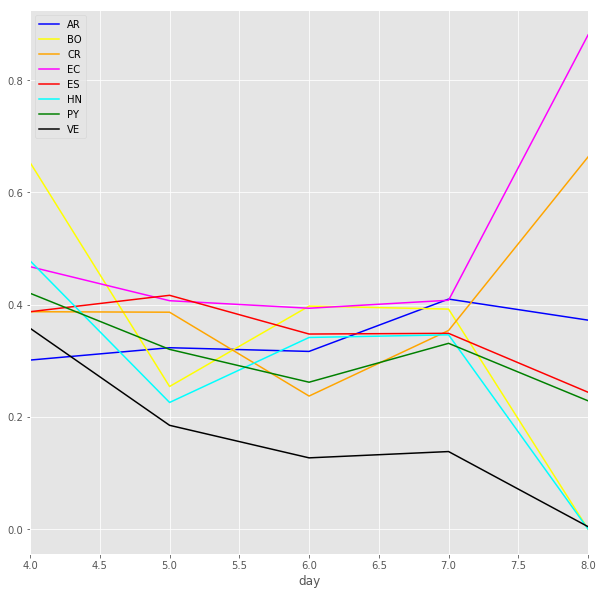

In [28]:
countries = ('AR', 'BO', 'CR', 'EC', 'ES', 'HN', 'PY', 'VE')
colors = {'AR': 'blue', 'BO': 'yellow', 'CR': 'orange', 
          'EC': 'magenta', 'ES': 'red', 'HN': 'cyan', 
          'PY': 'green', 'VE': 'black'}

for country in countries:
    df_one_contry = df[df.country_code == country]
    result = df_one_contry.groupby([df_one_contry.created_at.dt.day])['sentiment'].mean()
    result.plot(label=country, legend=True, figsize=(10,10), color=colors.get(country)).set_xlabel('day')

The next plot shows the mean per day and per country, only tweets with negative or positive feelings.

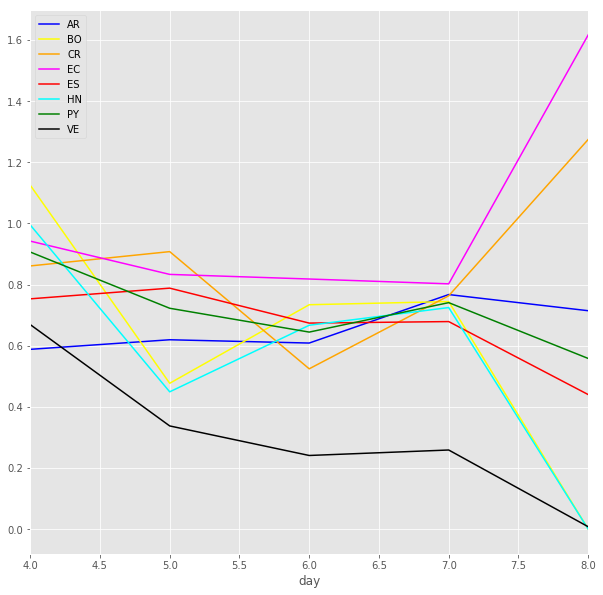

In [40]:
for country in countries:
    df_one_contry = df[(df.country_code == country) & (df.sentiment != 0)]
    result = df_one_contry.groupby([df_one_contry.created_at.dt.day])['sentiment'].mean()
    result.plot(label=country, legend=True, figsize=(10,10), color=colors.get(country)).set_xlabel('day')

The next plot shows the mean per day and per country, with sentiment represented as 3 values (negative=-1, neutral=0, positive=+1).

/usr/local/lib/python3.5/dist-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


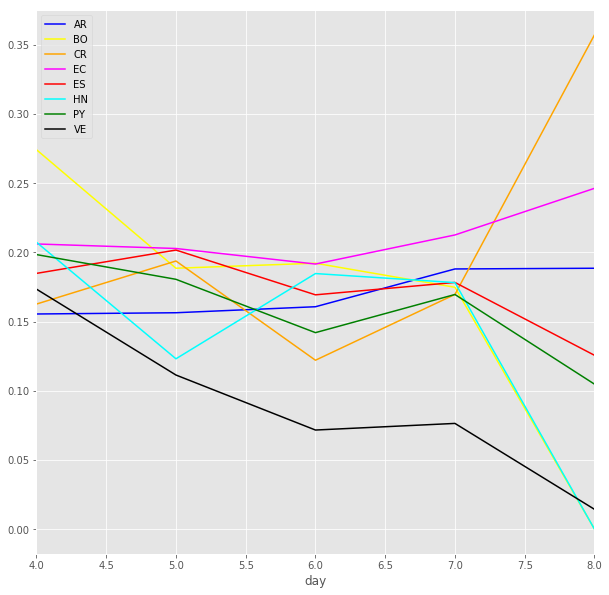

In [30]:
for country in countries:
    df_one_contry = df[df.country_code == country]
    df_one_contry.loc[df.sentiment > 0, 'sentiment'] = 1
    df_one_contry.loc[df.sentiment < 0, 'sentiment'] = -1
    result = df_one_contry.groupby([df_one_contry.created_at.dt.day])['sentiment'].mean()
    result.plot(label=country, legend=True, figsize=(10,10), color=colors.get(country)).set_xlabel('day')

The same without neutral feelings.

/usr/local/lib/python3.5/dist-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


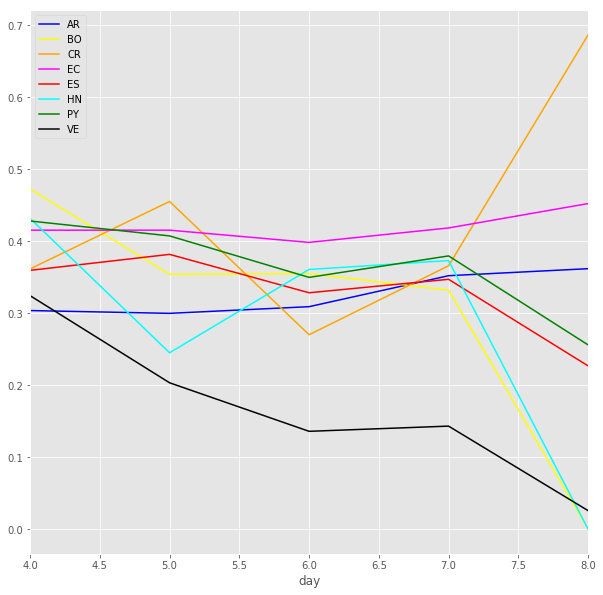

In [31]:
for country in countries:
    df_one_contry = df[(df.country_code == country) & (df.sentiment != 0)]
    df_one_contry.loc[df.sentiment > 0, 'sentiment'] = 1
    df_one_contry.loc[df.sentiment < 0, 'sentiment'] = -1
    result = df_one_contry.groupby([df_one_contry.created_at.dt.day])['sentiment'].mean()
    result.plot(label=country, legend=True, figsize=(10,10), color=colors.get(country)).set_xlabel('day')

Now, we are going to visualize the data through histograms. One per country.

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


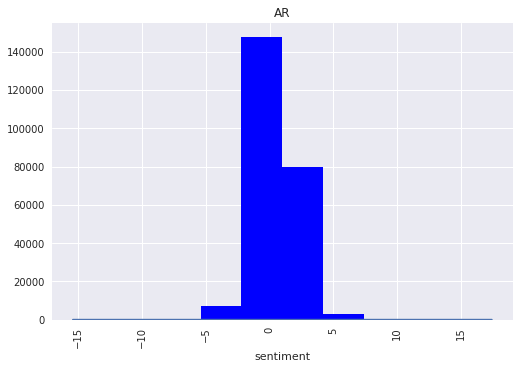

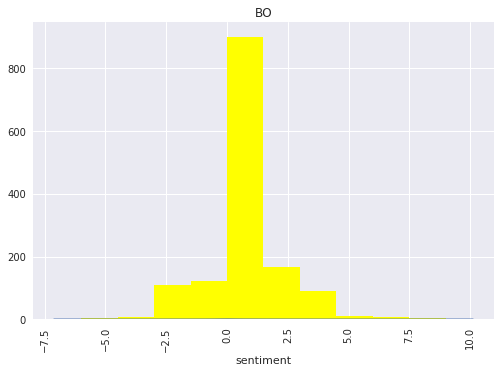

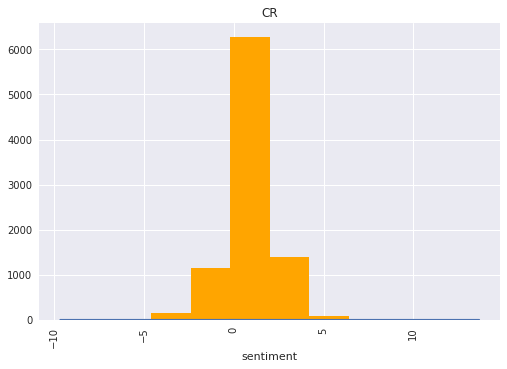

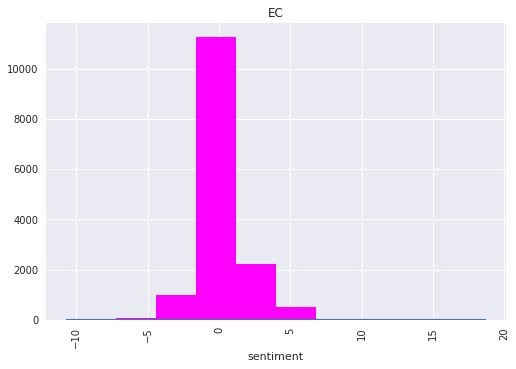

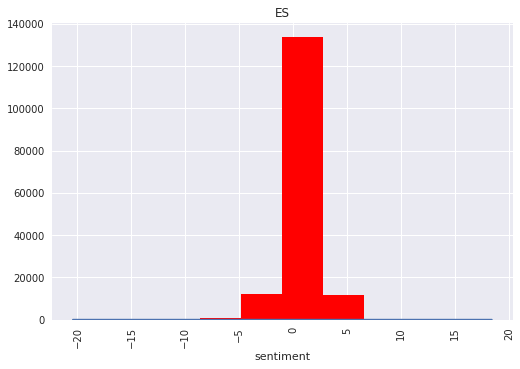

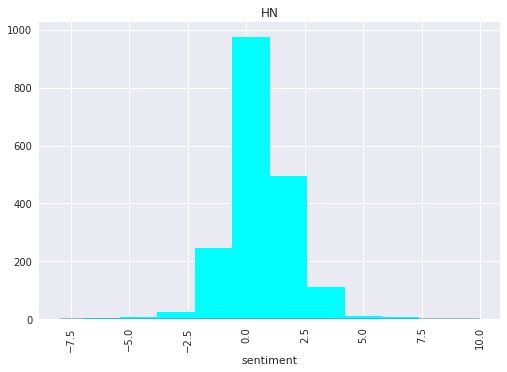

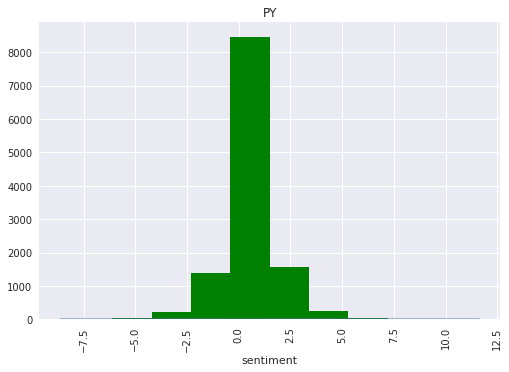

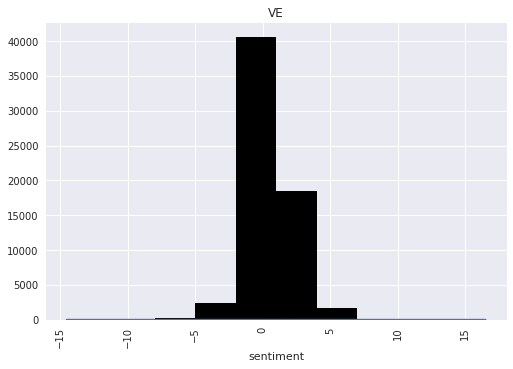

In [54]:
for country in countries:
    df_one_contry = df[df.country_code == country]
    df_one_contry.hist(column='sentiment', by='country_code', color=colors.get(country))

The next plot shows a boxplot of all countries together, so we can compare their sentiment distributions easily.

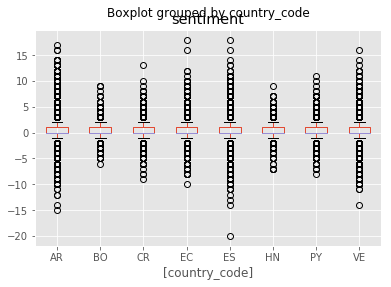

In [20]:
df[['country_code','sentiment']].boxplot(by='country_code')